# Introduction to Machine Learning — 2024/2025 Unsupervised Learning

This assignment will demonstrate how a learning algorithm can distinguish between two distributions of points generated with different parameters, using no information on the target values.


## Exercise 1
Generate 2D points using a multivariate Gaussian distribution
1. Use the code in Fig. 1 to generate two sets, each with 500 points (reduce this number if necessary to obtain better visualizations or faster training runs),
2. Each dataset should have different centers, and sets should have a small overlap.
3. Add a column and fill it with 1 (one) for the first dataset and 2 (two) on the second, so that you can keep track of which distribution generated each point.
4. Join and shuffle the dataset.
5. The plot of the first two columns should be similar to the one presented in Fig. 2.
6. Write the dataset to a file. 

In [1]:
# import packages
import matplotlib . pyplot as plt 
from matplotlib.patches import Circle
import numpy as np
from numpy import genfromtxt
import random
import math

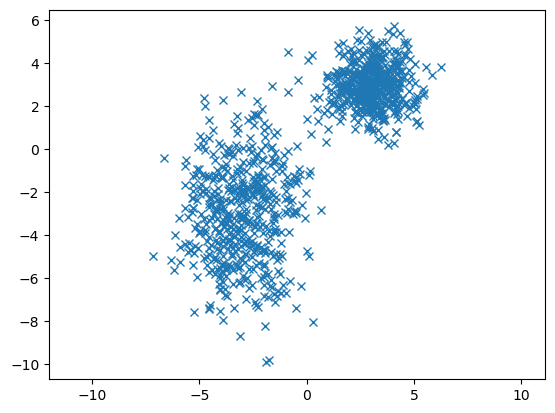

In [2]:
# generate data

mean= [3, 3]
cov = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean, cov, 500).T

new_col_a = np.ones((1, a.shape[1]))
a = np.append(a, new_col_a, axis = 0)

mean= [-3, -3]
cov = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean, cov, 500).T

new_col_b = np.full((1, b.shape[1]), 2)
b = np.append(b, new_col_b, axis = 0)

c = np.concatenate((a, b) , axis = 1) 
c=c.T
np.random.shuffle(c)
c=c.T

x = c[0] 
y=c[1]
labels=c[2]
plt.plot(x, y, "x") 
plt.axis("equal") 
plt .show()

# save and load data
np.savetxt("testData.csv", c, delimiter=",")
data = genfromtxt('testData.csv', delimiter=',')

### Exercise 1.1 Implement a simple version of K-Means

Start by choosing two random points in the dataset r1 and r2 and apply the following adaptation rule:

    for all x ∈ the dataset do
        if x is closer to r1 than to r2 then
            r1 ←(1−α)×r1 +α×x
        else if x is closer to r2 than to r1 then
            r2 ←(1−α)×r2 +α×x 
        end if
    end for


#  &

### Exercise 1.2 
Repeat for 10 times a passage through all the elements of the dataset (i.e. 10 epochs) with α = 10E − 5 and save:

(i) the consecutive values of r1 and r2 for the first passage; 

(ii) the values of r1 and r2 at the end of each passage.

In [3]:
def getEuclideanDistance(point1x, point1y, point2x, point2y):
    distance = math.sqrt((point1x-point2x)**2+(point1y-point2y)**2)
    return(distance)

initial r1:[3.59728744 3.54335174 1.        ]
initial r2:[2.99977678 4.30398472 1.        ]
final r1:[-2.9892682  -3.00296868  1.        ]
final r2:[2.98707164 3.07635251 1.        ]


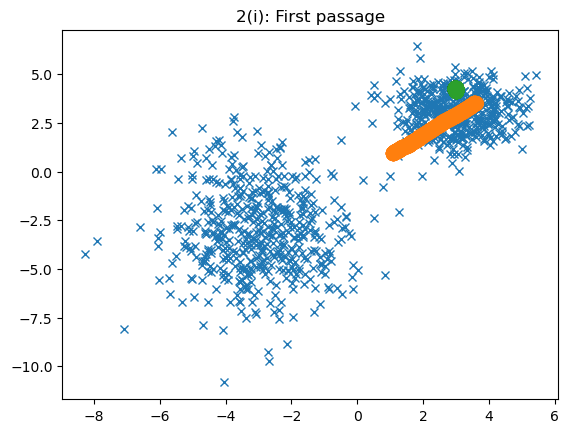

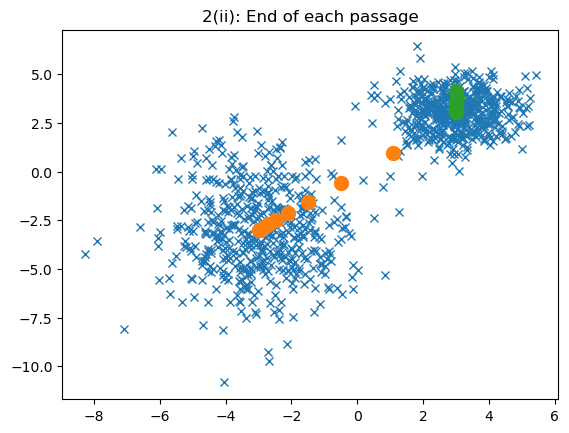

In [32]:
# function for implementing k-means simplified 
def kmeans(num_epochs, alpha):

    # arrays to store the states of the clusters
    final_clusters = np.zeros((num_epochs, 2, 3))
    clusters_first_passage = np.zeros((1000, 2, 3))

    # Pick two random points from the set as initial clusters
    initial_cluster_indx = random.sample(range(1, 1000), 2)
    r_1 = c.T[initial_cluster_indx[0]]
    r_2 = c.T[initial_cluster_indx[1]]

    print(f"initial r1:{r_1}")
    print(f"initial r2:{r_2}")

    for j in range(0, num_epochs):
        # run through every point in the datset
        for i in range(0, len(c.T)):
            point = c.T[i]
            # distances between the point and the current cluster centers
            r_1d = getEuclideanDistance(point[0], point[1], r_1[0], r_1[1])
            r_2d = getEuclideanDistance(point[0], point[1], r_2[0], r_2[1])

            # move the cluster that is closer towards the current point
            if r_1d < r_2d:
                r_1[0] = (1 - alpha) * r_1[0] + alpha * point[0]
                r_1[1] = (1 - alpha) * r_1[1] + alpha * point[1]
    
            if r_2d < r_1d:
                r_2[0] = (1 - alpha) * r_2[0] + alpha * point[0]
                r_2[1] = (1 - alpha) * r_2[1] + alpha * point[1]

            if j == 0:
                clusters_first_passage[i, 0] = r_1
                clusters_first_passage[i, 1] = r_2

        # save the state of the clusters at the end of each passage
        final_clusters[j, 0] = r_1
        final_clusters[j, 1] = r_2
    
    print(f"final r1:{r_1}")
    print(f"final r2:{r_2}")

    # plot the clusters of the first passage
    plt.plot(x,y,'x')
    plt.title('2(i): First passage')
    plt.plot(clusters_first_passage.T[0][0], clusters_first_passage.T[1][0], 'o', markersize=10)
    plt.plot(clusters_first_passage.T[0][1], clusters_first_passage.T[1][1], 'o', markersize=10)
    plt.show()

    # plot the clusters at the end of each passage
    plt.plot(x, y, 'x')
    plt.title('2(ii): End of each passage')
    plt.plot(final_clusters.T[0][0], final_clusters.T[1][0], 'o', markersize=10)
    plt.plot(final_clusters.T[0][1], final_clusters.T[1][1], 'o', markersize=10)
    plt.show()

    return

kmeans(10, 0.001)


### Exercise 1.3

Plot (i) and (ii) upon the dataset plot in different graphs. Change the value of α and the number of epochs to see the evolution of the representatives clearly. What do you conclude about the evolution of the two points in the different situations? Is there any relation between the final values of the representatives (r1 and r2) and the parameters used to generate the dataset?

initial r1:[-2.72399365 -1.0524095   2.        ]
initial r2:[3.61757708 3.61961686 1.        ]
final r1:[-3.12713476 -3.04868716  2.        ]
final r2:[2.94280706 3.05845758 1.        ]


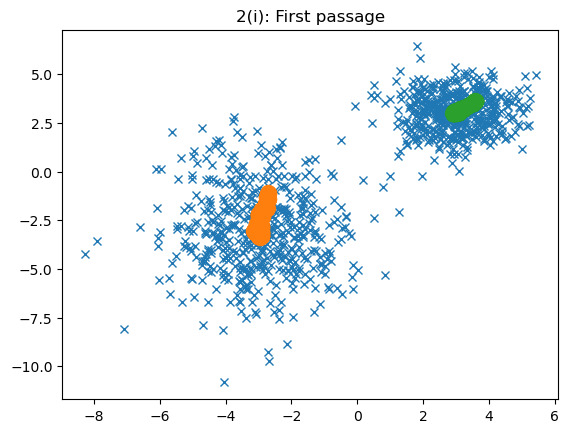

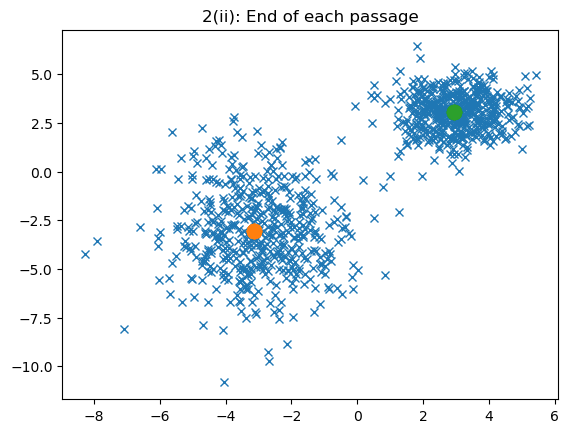

In [33]:
kmeans(10, 0.01)

#### What effect does changing the parameters alpha and the number of epochs have?

After trying out multiple values of alpha and number of epochs, we can say that in both cases, a higher value leads to more movement of k1 and k2. The clusters adapt and change more and faster. Changing the alpha to a bigger number seems to have a stronger corrective effect that changing the epochs to a higher repetition.

When we increase alpha to a high value (e.g. 0.1) the points are not changing in between epochs any more because the movement is the same in all circuits. This is because we loop through the data set in the same order each passage.

Also, if we chose suitable parameter values for alpha and epochs (big enough alpha, enough epochs) we will eventually find that the centroids converge to the true cluster means (since that is the definition of a mean).


### Exercise 1.4

 Instead of changing the value of the representatives for each example, accumulate the values of the difference (x − r) and change the value only when all examples have been observed. Accumulate only for the closest representative in each iteration.

    for all x do
        d ← d + (x − r)
    end for
        r ← r + (α/n_examples) ∗ d

# &


### Exercise 1.5
 Plot the consecutive positions of r1 and r2 and compare with the plot in exercise 1.

What do you observe?


# &

### Exercise 1.6

Plot with different colors:

- color 1 – points closer to r1 labeled 1;
- color 2 – points closer to r1 labeled 2; 
- color 3 – points closer to r2 labeled 1; 
- color 4 – points closer to r2 labeled 2.
 
What do you observe?




In [42]:
# Exercise 1.4: Accumulate d over all observations

def kmeans_acc(alpha, num_passages, skip_plot=False):

    initial_cluster_indx = random.sample(range(1, 1000), 2)
    r_1 = c.T[initial_cluster_indx[0]]
    r_2 = c.T[initial_cluster_indx[1]]

    # array to save the final clusters
    final_clusters = np.zeros((num_passages, 2, 3))

    for j in range(0, num_passages):
        cluster1_obs = 0
        cluster2_obs = 0
        difference_1 = np.zeros((2))
        difference_2 = np.zeros((2))

        if j > 0:
            r_1 = final_clusters[j-1][0]
            r_2 = final_clusters[j-1][1]

        my_list = []
        for i in range(0, len(c.T)):
            point = c.T[i]
            r_1d = getEuclideanDistance(point[0], point[1], r_1[0], r_1[1])
            r_2d = getEuclideanDistance(point[0], point[1], r_2[0], r_2[1])

            if r_1d < r_2d:
                difference_1[0] += (point[0] - r_1[0])
                difference_1[1] += (point[1] - r_1[1])
                cluster1_obs += 1 #add to the observations closer to cluster 1
                my_list.append(1)

            if r_2d < r_1d:
                difference_2[0] += (point[0] - r_2[0])
                difference_2[1] += (point[1] - r_2[1])
                cluster2_obs += 2 # add to the observations closer to cluster 2
                my_list.append(2)
        
        if skip_plot==False:
            # plot the original cluster centers
            plt.figure()
            plt.plot(r_1[0], r_1[1], 'o', markersize=10, label='old cluster 1')
            plt.plot(r_2[0], r_2[1], 'o', markersize=10, label='old cluster 2')

        r_1[0] += (alpha/cluster1_obs) * difference_1[0]
        r_1[1] += (alpha/cluster1_obs) * difference_1[1]
        r_2[0] += (alpha/cluster2_obs) * difference_2[0]
        r_2[1] += (alpha/cluster2_obs) * difference_2[1]

        # determine the cluster centers of the clusters the points actually belong to
        c1 = np.mean(c.T[c.T[:,2] == 1], axis=0)
        c2 = np.mean(c.T[c.T[:,2] == 2], axis=0)
        
        r1_c1dist = getEuclideanDistance(c1[0], c1[1], r_1[0], r_1[1])
        r2_c1dist = getEuclideanDistance(c1[0], c1[1], r_2[0], r_2[1])

        closer = np.array(my_list)

        if r1_c1dist < r2_c1dist:
            final_clusters[j][0] = r_1
            final_clusters[j][1] = r_2
        else: # swap the position of the clusters if necessary
            final_clusters[j][0] = r_2
            final_clusters[j][1] = r_1
            closer = (closer * -1) + 3

        c_copy = np.append(c, [closer], axis=0) # add the information which cluster each point is closer to

        final_clusters[j][0][2] = 1
        final_clusters[j][1][2] = 2

        colors = []
        for subarray in c_copy.T: # four different colours for plotting exercise 1.6
            if subarray[2] == 1 and subarray[3] == 1:
                colors.append('red')  # Color 1: correctly assigned to cluster 1
            elif subarray[2] == 2 and subarray[3] == 2:
                colors.append('blue')  # Color 2: correctly assigned to cluster 2
            elif subarray[2] == 1 and subarray[3] == 2:
                colors.append('green')  # Color 3: incorrectly assigned to cluster 2
            elif subarray[2] == 2 and subarray[3] == 1:
                colors.append('yellow')  # Color 4: incorrectly assigned to cluster 1

        # Plot the points with the colours
        if skip_plot==False:
            for i, subarray in enumerate(c_copy.T):
                plt.scatter(subarray[0], subarray[1],color=colors[i], s=10)

            plt.plot(final_clusters[j][0][0], final_clusters[j][0][1], 'o', markersize=10, label='new cluster 1')
            plt.plot(final_clusters[j][1][0], final_clusters[j][1][1], 'o', markersize=10, label='new cluster 2')

            # Adding labels, title, and legend
            plt.xlabel('X-axis')
            plt.ylabel('Y-axis')
            plt.title('Plot of Sub-arrays with Different Colors Based on assignment')
            plt.legend(loc='lower right')
            plt.show()
    
    if skip_plot==False: # plot the evolution of the cluster centers over each iteration 
        plt.plot(x, y, 'x')
        plt.title('Evolution of cluster centers')
        plt.plot(final_clusters.T[0][0], final_clusters.T[1][0], 'o', label='Cluster 1')
        plt.plot(final_clusters.T[0][1], final_clusters.T[1][1], 'o', label='Cluster 2')
        plt.legend(loc='lower right')
        plt.show()

    return final_clusters[num_passages-1]


### What do you observe?

Again the movement of r1, r2 are dependent on their random first value and the values of alpha and epoche. 
However, the movement of r1, r2 seems to be more targeted and does not randomly jump here and there depending on which random point was classified just now. If we would set epoche to (move until no change between r1 and r1End and r2 and r2End) the final and mainly correct clustering could be achieved.

Overall, this k-means version works faster and more reliable.


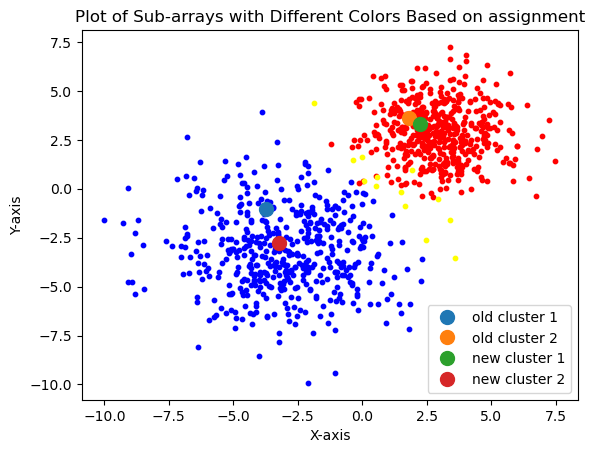

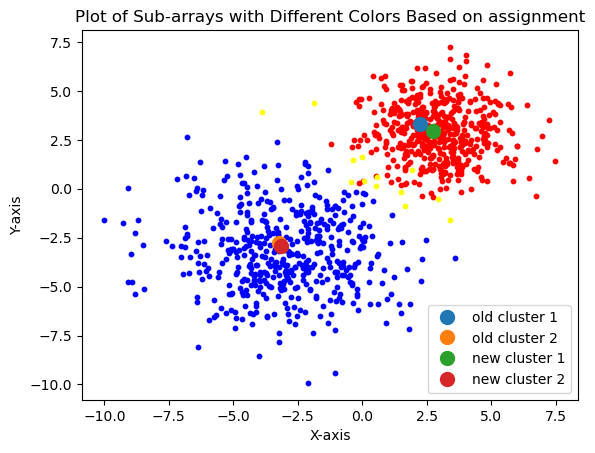

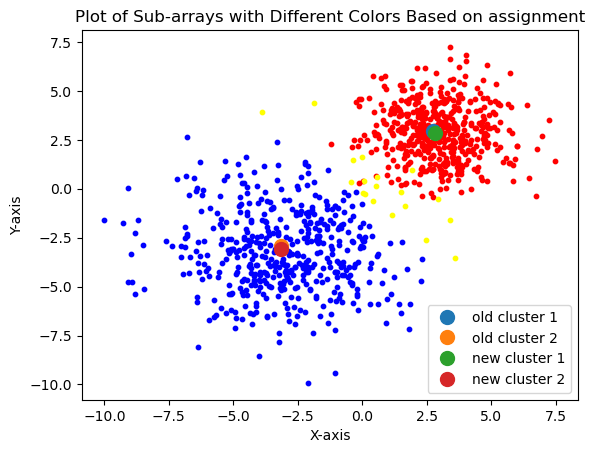

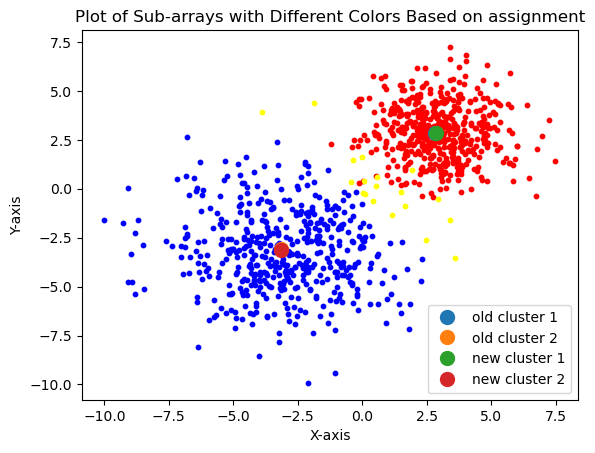

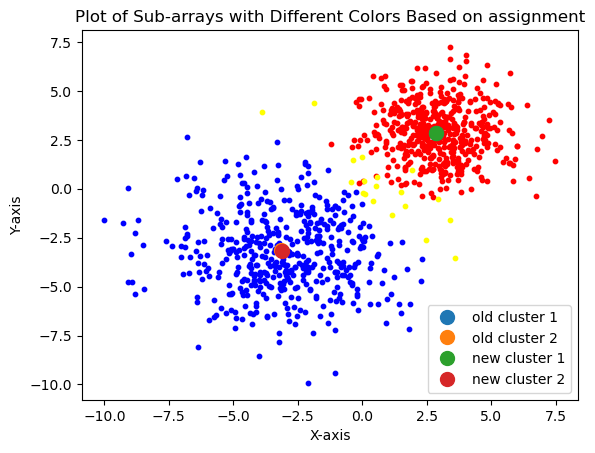

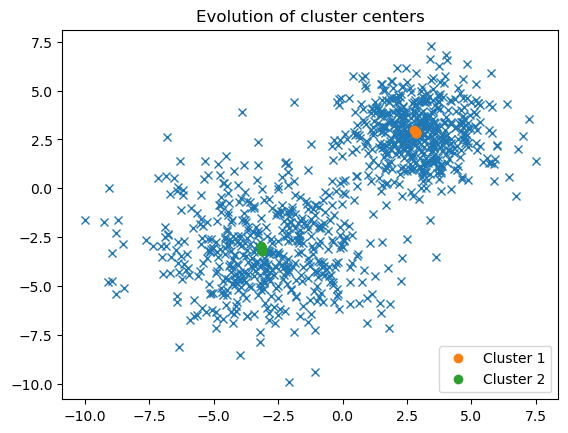

array([[ 2.86379695,  2.82798627,  1.        ],
       [-3.12500256, -3.17809675,  2.        ]])

In [44]:
# create new set of points around two clusters
mean = [ 3 , 3]
cov = [ [ 2 , 0] , [0 , 2 ] ]
a = np.random.multivariate_normal(mean, cov , 500).T
new_col_a = np.full((1, a.shape[1]), 1)
a = np.append(a, new_col_a, axis = 0)

mean = [ -3 , -3]
cov = [ [ 5 , 0] , [0 , 5 ] ]
b = np.random.multivariate_normal(mean, cov , 500).T
new_col_b = np.full((1, b.shape[1]), 2)
b = np.append(b, new_col_b, axis = 0)

c = np.concatenate ( ( a , b) , axis = 1 )
c = c.T
np.random.shuffle ( c )
c = c.T

x = c[0]
y = c[1]
labels = c[2]

# execute the kmeans-cluster
kmeans_acc(0.8, 5)

#### What do we observe?

since we define the random starting points randomly, we cannot be sure that we have one from each cluster and therefore, when they each move to one of the clusters (since we named the clusters in advance) it is possible, that the naming does not give the right expression in the end. 

To fix that, we include a check where we compute the distance between the actual cluster center and our calculated centroids in order to decide which of the clusters is which.

Apart from that, we see that with good aligned parameters, the clusters seem to be mainly correct classified and only a few points on the borders are misclustered.


### Exercise 1.7

Repeat the experiment 30 times and plot the final values of r1 and r2 over the dataset. If necessary amplify the viewed area to see the points’ distributions.

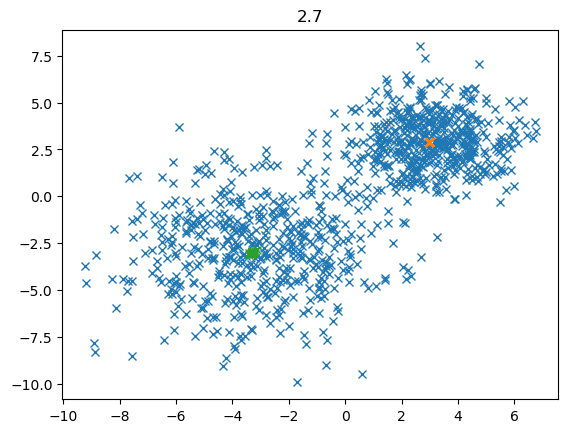

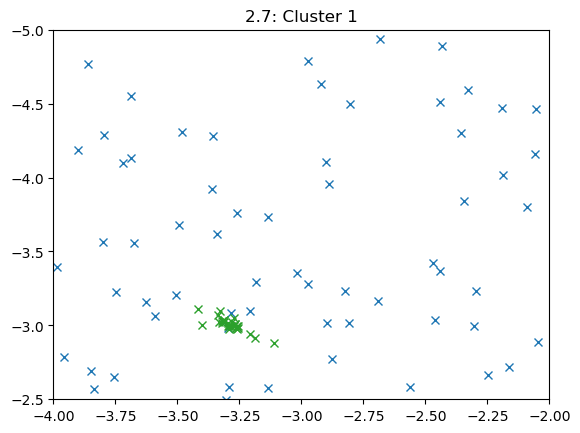

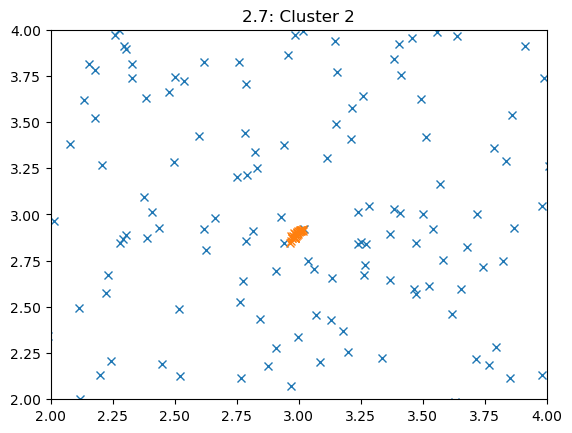

In [8]:
# repeat experiment 30 times 
repeat = np.zeros((30, 2, 3))
for i in range(0, 30):
    repeat[i] = kmeans_acc(0.8, 10, skip_plot=True)

#plt.plot(x, y, 'x')
plt.title('2.7')
plt.plot(x,y,'x')
plt.plot(repeat.T[0][0], repeat.T[1][0], 'x')
plt.plot(repeat.T[0][1], repeat.T[1][1], 'x')
plt.show()

plt.title('2.7: Cluster 1')
plt.plot(x,y,'x')
plt.plot(repeat.T[0][0], repeat.T[1][0], 'x')
plt.plot(repeat.T[0][1], repeat.T[1][1], 'x')
plt.xlim(-4, -2)
plt.ylim(-2.5, -5)
plt.show()

plt.title('2.7: Cluster 2')
plt.plot(x,y,'x')
plt.plot(repeat.T[0][0], repeat.T[1][0], 'x')
plt.plot(repeat.T[0][1], repeat.T[1][1], 'x')
plt.xlim(2, 4)
plt.ylim(2, 4)
plt.show()

# Exercise 2

Implement a simplified version of agglomerative hierarchical clustering, as proposed in the following algorithm.

    while there are more than two points do
        Find the closest two points
        Replace both points by their average
    end while

Test it on sets of points similar to the ones of the last exercise.  

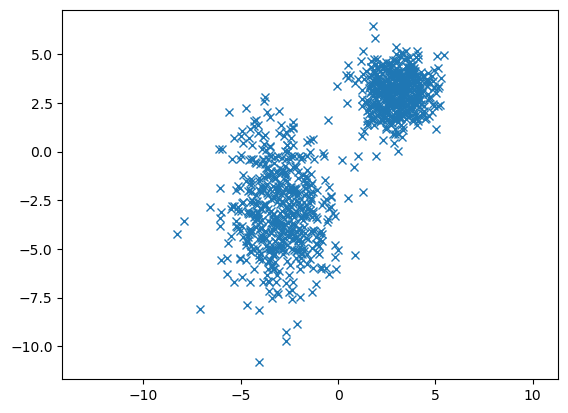

In [24]:
# generate data

mean= [3, 3]
cov = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean, cov, 500).T

new_col_a = np.ones((1, a.shape[1]))
a = np.append(a, new_col_a, axis = 0)

mean= [-3, -3]
cov = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean, cov, 500).T

new_col_b = np.full((1, b.shape[1]), 2)
b = np.append(b, new_col_b, axis = 0)

c = np.concatenate((a, b) , axis = 1) 
c=c.T
np.random.shuffle(c)
c=c.T

x = c[0] 
y=c[1]
labels=c[2]
plt.plot(x, y, "x") 
plt.axis("equal") 
plt.show()

# save and load data
np.savetxt("testData.csv", c, delimiter=",")
data = genfromtxt('testData.csv', delimiter=',')

In [30]:
dataSetInProgress = data.T
#dataSetInProgress = np.array([[1,2,1],[1,3,1], [2,3,1], [1,1,1], [3,2,1], [3,3,1], [8,8,2], [9,7,2], [9,9,2], [9,10,2], [8,10,2], [7, 8, 2], [9,8,2]])

mapCombinedHashToDistance = {}
mapHashToPoint = {}

# get all distances between all points
for indexI, i in enumerate(dataSetInProgress):
    mapHashToPoint[str(indexI)] = i
    for indexJ, j in enumerate(dataSetInProgress):
        if not ((i==j).all()):
            distance = getEuclideanDistance(i[0], i[1], j[0], j[1])
            mapCombinedHashToDistance[str(indexI) + "." + str(indexJ)] = distance

# initiate counter to name newPoints according to their index position
mapHashToPointCopy = mapHashToPoint.copy()
newIndexNumber = len(mapHashToPointCopy)


while len(mapHashToPoint)>2:

    # get points with least distance
    IndexesWithShortestDistance = min(mapCombinedHashToDistance, key=mapCombinedHashToDistance.get)
    index1, index2 = IndexesWithShortestDistance.split(".")
    point1 = mapHashToPoint[index1]
    point2 = mapHashToPoint[index2]
    pairWithShortestDistance = np.array([point1, point2])

    # calculate midpoint
    newPointInMIddle = np.mean(pairWithShortestDistance, axis = 0)

    # add newPointInMIddle to dictionary with all points
    indexNewPoint = str(newIndexNumber)
    print(indexNewPoint)
    mapHashToPoint[str(newIndexNumber)] = newPointInMIddle

    # delete two old closest points from dictionary with all points 
    del mapHashToPoint[index1]
    del mapHashToPoint[index2]


    # delete all distances inclusing the two old closest points from dictionary with distances 
    newDict = {}
    for key, value in mapCombinedHashToDistance.items():
        pointIndices = key.split(".")
        if str(index1) == pointIndices[0] or str(index1) == pointIndices[1] or str(index2) == pointIndices[0] or str(index2) == pointIndices[1] :
            continue
        else:
            newDict[key] = value

    mapCombinedHashToDistance = newDict

    # get new distances from each old point to new point and append to dictionaryWithDistances
    for key, value in mapHashToPoint.items():
        if key == indexNewPoint:
            continue
        else:
            distance = getEuclideanDistance(value[0], value[1], newPointInMIddle[0], newPointInMIddle[1])
            mapCombinedHashToDistance[str(key) + "." + indexNewPoint] = distance
    
    # add one to index counter
    newIndexNumber += 1


    print(f"length dictionary with all distancces: {len(mapHashToPoint)}")

print(mapHashToPoint)

1000
length dictionary with all distancces: 999
1001
length dictionary with all distancces: 998
1002
length dictionary with all distancces: 997
1003
length dictionary with all distancces: 996
1004
length dictionary with all distancces: 995
1005
length dictionary with all distancces: 994
1006
length dictionary with all distancces: 993
1007
length dictionary with all distancces: 992
1008
length dictionary with all distancces: 991
1009
length dictionary with all distancces: 990
1010
length dictionary with all distancces: 989
1011
length dictionary with all distancces: 988
1012
length dictionary with all distancces: 987
1013
length dictionary with all distancces: 986
1014
length dictionary with all distancces: 985
1015
length dictionary with all distancces: 984
1016
length dictionary with all distancces: 983
1017
length dictionary with all distancces: 982
1018
length dictionary with all distancces: 981
1019
length dictionary with all distancces: 980
1020
length dictionary with all distancc

### Test the algorithm

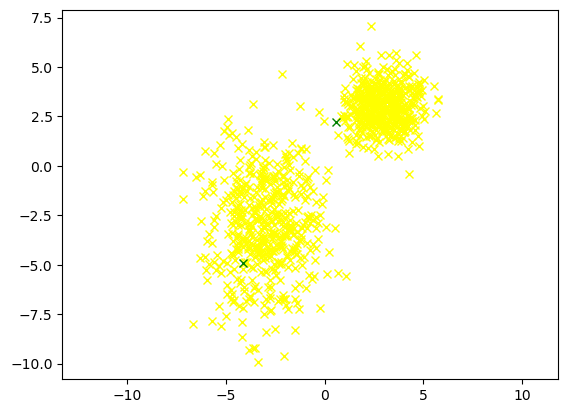

In [12]:
x = data[0] 
y=data[1]

xClusterMidPoints = []
yClusterMidPoints = []

for key, value in mapHashToPoint.items():
    xClusterMidPoints.append(value[0])
    yClusterMidPoints.append(value[1])

plt.title("All data and the two final points")
plt.plot(x, y, "x", color = "yellow") 
plt.plot(xClusterMidPoints, yClusterMidPoints, "x", color = "green") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis("equal") 
plt.show()

[-4.116405276178023, 0.5606987802185994]
[-4.8974673157674795, 2.204254751026671]


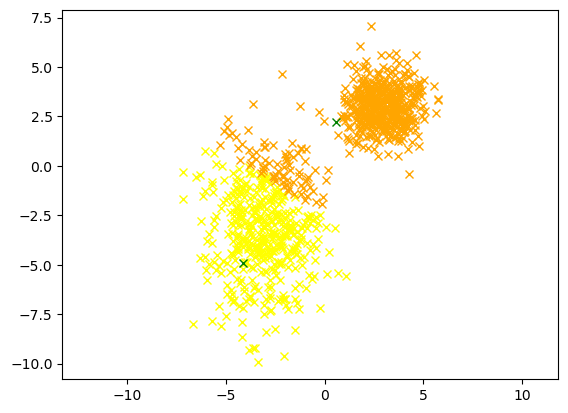

In [13]:
# assign each point to closer mid point to have two clusters

firstMidPoint = [xClusterMidPoints[0], yClusterMidPoints[0]]
secondMidPoint = [xClusterMidPoints[1], yClusterMidPoints[1]]

cluster1 = []
cluster2 = []

dataCopy = data.copy().T

for i in range(len(dataCopy)):
        # divide every point in coordinates and label
        coordinate = dataCopy[i]

        # get distance to both k
        distanceToR1 = getEuclideanDistance(firstMidPoint[0],firstMidPoint[1], coordinate[0], coordinate[1])
        distanceToR2 = getEuclideanDistance(secondMidPoint[0],secondMidPoint[1], coordinate[0], coordinate[1])

        # append to cluster of k to which point is closer
        if distanceToR1 < distanceToR2:
            cluster1.append(coordinate)
        else:
            cluster2.append(coordinate)


cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)


xCluster1 = cluster1[:, 0] 
yCluster1 = cluster1[:, 1] 

xCluster2 = cluster2[:, 0] 
yCluster2 = cluster2[:, 1] 

print(xClusterMidPoints)
print(yClusterMidPoints)

plt.title("All data divided into the clusters and the two final points")

plt.plot(xCluster1, yCluster1, "x", color = "yellow") 
plt.plot(xCluster2, yCluster2, "x", color = "orange") 

plt.plot(xClusterMidPoints, yClusterMidPoints, "x", color = "green") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis("equal") 
plt.show()

total: 1000


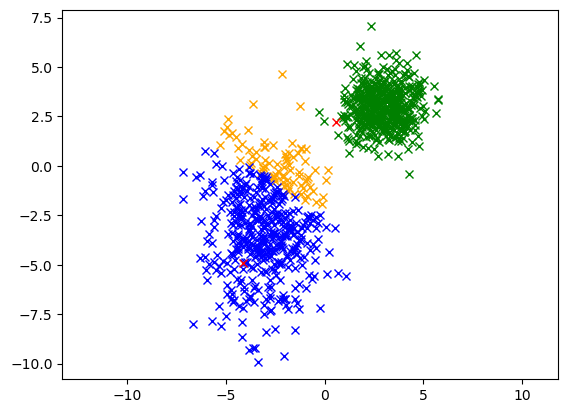

In [14]:
# add different colours for true labels

mask = np.isin(element = cluster1[:, 2],test_elements = 1)
TrueCluster1 = cluster1[mask]

mask = np.isin(element = cluster1[:, 2],test_elements = 1)
FalseCluster1 = cluster1[~mask]

mask = np.isin(element = cluster2[:, 2],test_elements = 2)
TrueCluster2 = cluster2[mask]


mask = np.isin(element = cluster2[:, 2],test_elements = 2)
FalseCluster2 = cluster2[~mask]

print(f"total: {len(TrueCluster1) +len(FalseCluster1) + len(TrueCluster2) + len(FalseCluster2)}")


xCluster1True = TrueCluster1[:, 0] 
yCluster1True = TrueCluster1[:, 1] 

xCluster1False = FalseCluster1[:, 0] 
yCluster1False = FalseCluster1[:, 1] 

xCluster2True = TrueCluster2[:, 0] 
yCluster2True = TrueCluster2[:, 1] 

xCluster2False = FalseCluster2[:, 0] 
yCluster2False = FalseCluster2[:, 1] 

plt.title("All data with true and chosen cluster and the two final points")
plt.plot(xCluster1True, yCluster1True, "x", color = "yellow") 
plt.plot(xCluster2True, yCluster2True, "x", color = "orange") 
plt.plot(xCluster1False, yCluster1False, "x", color = "blue") 
plt.plot(xCluster2False, yCluster2False, "x", color = "green") 


plt.plot(xClusterMidPoints, yClusterMidPoints, "x", color = "red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis("equal") 
plt.show()



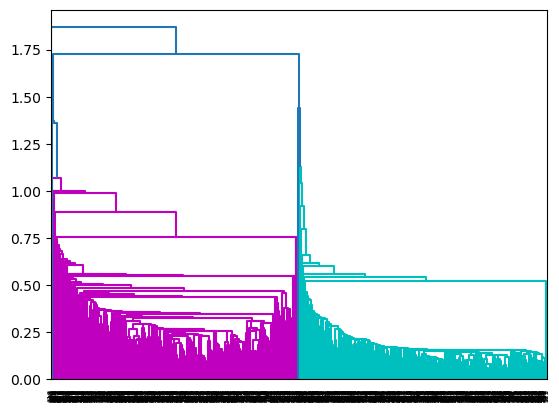

In [15]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(data.T, 'single')
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
plt.title("Dendogram of the data points and their single linkage connections")

plt.figure()

dn = hierarchy.dendrogram(Z)

# Exercise 3

Implement the DBScan algorithm as described in https://www.youtube.com/watch?v=_A9Tq6mGtLI 
and demonstrate graphically the process with a series of snapshots of the process at key points with adequate descriptions.


119
Here we see all data points, that are still unprocessed. 
 The red point is the random current starting point.
 In orange we can see the radius in which we are looking for neighbours and count their number. 
 All purple points are withing the radius.


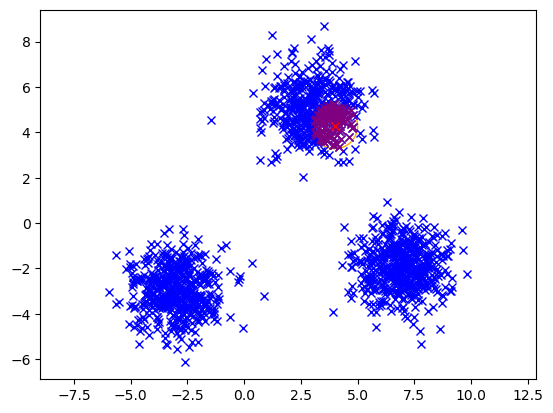

The starting point had more than minPts neighbours. 
 All yellow points are neighbours and are going to be clustered in one cluster. 
 Furthermore for each yellow point all neighbours will also be added to the current cluster.


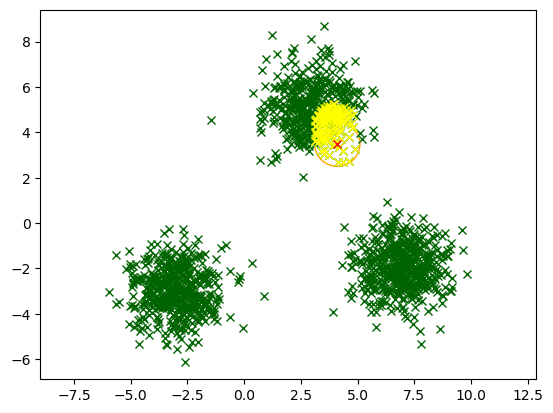

The starting point had more than minPts neighbours. 
 All yellow points are neighbours and are going to be clustered in one cluster. 
 Furthermore for each yellow point all neighbours will also be added to the current cluster.


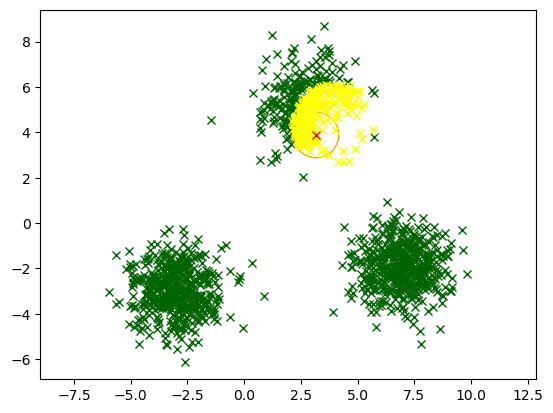

The starting point had more than minPts neighbours. 
 All yellow points are neighbours and are going to be clustered in one cluster. 
 Furthermore for each yellow point all neighbours will also be added to the current cluster.


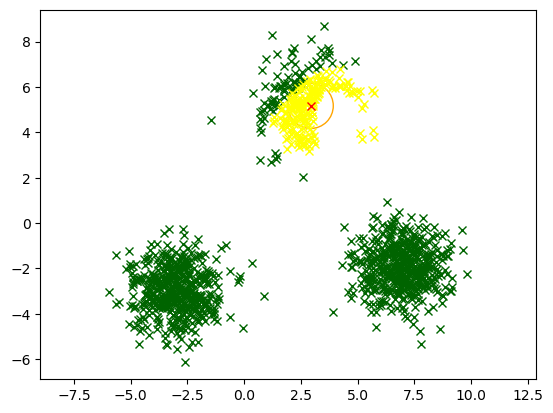

The starting point had more than minPts neighbours. 
 All yellow points are neighbours and are going to be clustered in one cluster. 
 Furthermore for each yellow point all neighbours will also be added to the current cluster.


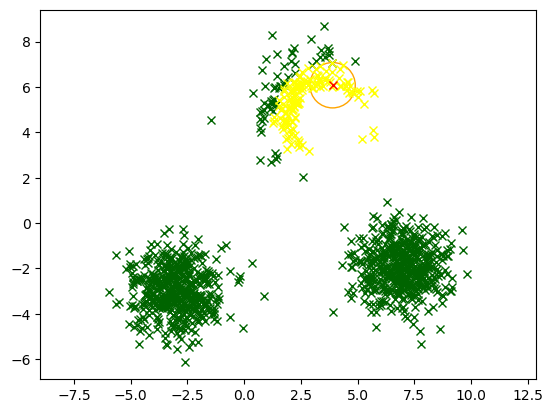

The starting point had more than minPts neighbours. 
 All yellow points are neighbours and are going to be clustered in one cluster. 
 Furthermore for each yellow point all neighbours will also be added to the current cluster.


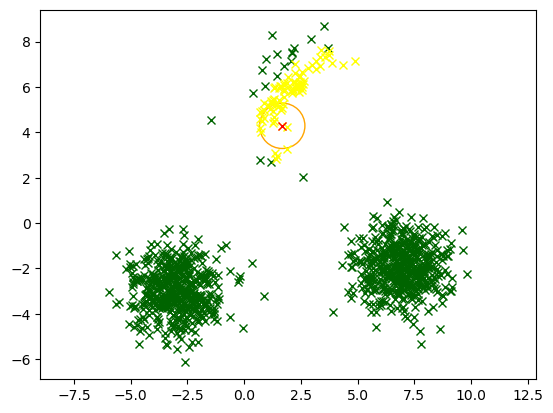

117
Here we see all data points, that are still unprocessed. 
 The red point is the random current starting point.
 In orange we can see the radius in which we are looking for neighbours and count their number. 
 All purple points are withing the radius.


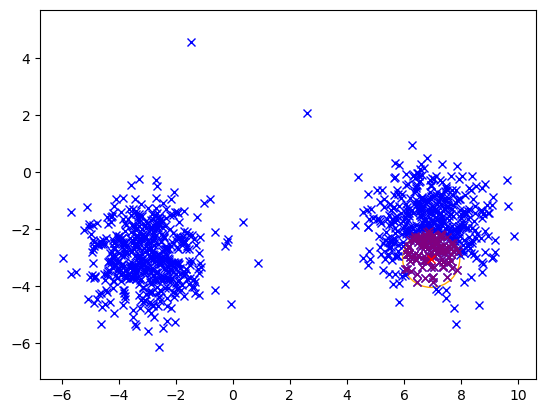

The starting point had more than minPts neighbours. 
 All yellow points are neighbours and are going to be clustered in one cluster. 
 Furthermore for each yellow point all neighbours will also be added to the current cluster.


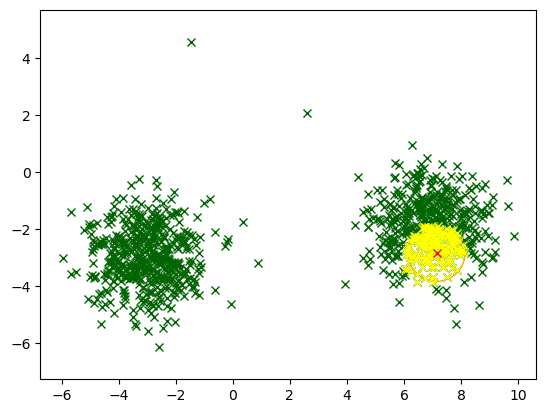

The starting point had more than minPts neighbours. 
 All yellow points are neighbours and are going to be clustered in one cluster. 
 Furthermore for each yellow point all neighbours will also be added to the current cluster.


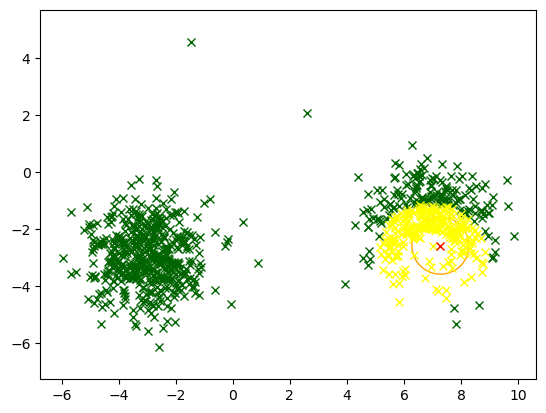

The starting point had more than minPts neighbours. 
 All yellow points are neighbours and are going to be clustered in one cluster. 
 Furthermore for each yellow point all neighbours will also be added to the current cluster.


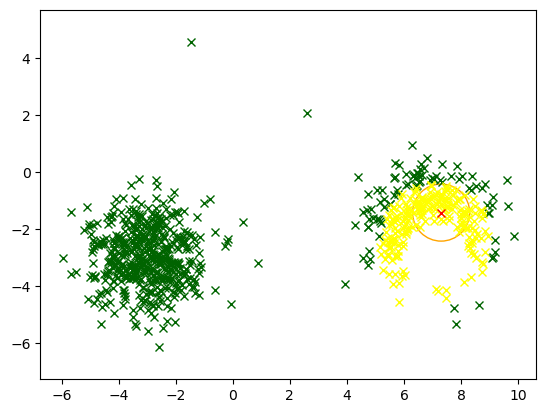

The starting point had more than minPts neighbours. 
 All yellow points are neighbours and are going to be clustered in one cluster. 
 Furthermore for each yellow point all neighbours will also be added to the current cluster.


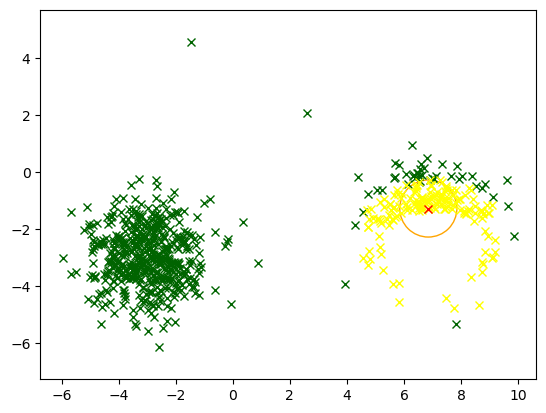

The starting point had more than minPts neighbours. 
 All yellow points are neighbours and are going to be clustered in one cluster. 
 Furthermore for each yellow point all neighbours will also be added to the current cluster.


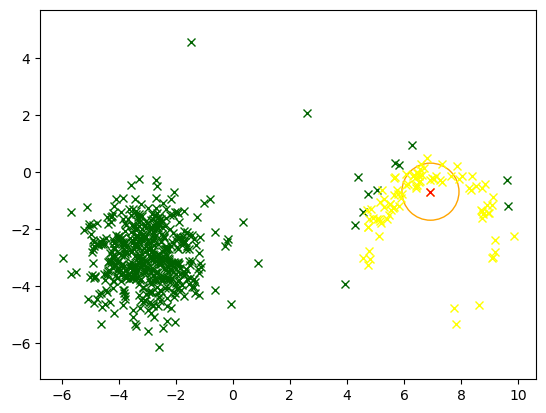

133
Here we see all data points, that are still unprocessed. 
 The red point is the random current starting point.
 In orange we can see the radius in which we are looking for neighbours and count their number. 
 All purple points are withing the radius.


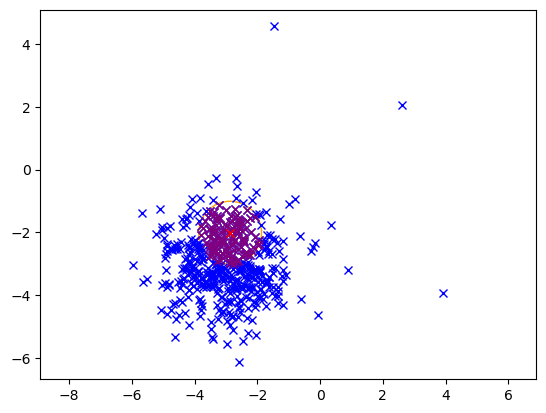

The starting point had more than minPts neighbours. 
 All yellow points are neighbours and are going to be clustered in one cluster. 
 Furthermore for each yellow point all neighbours will also be added to the current cluster.


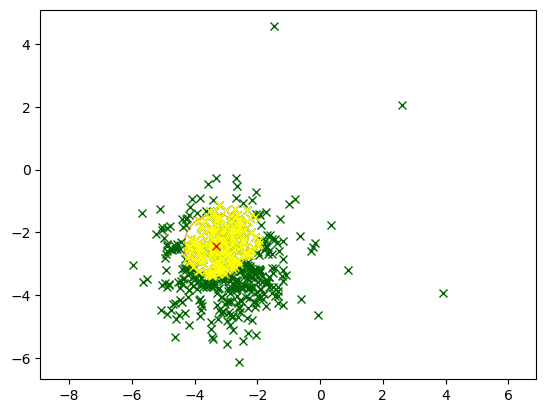

The starting point had more than minPts neighbours. 
 All yellow points are neighbours and are going to be clustered in one cluster. 
 Furthermore for each yellow point all neighbours will also be added to the current cluster.


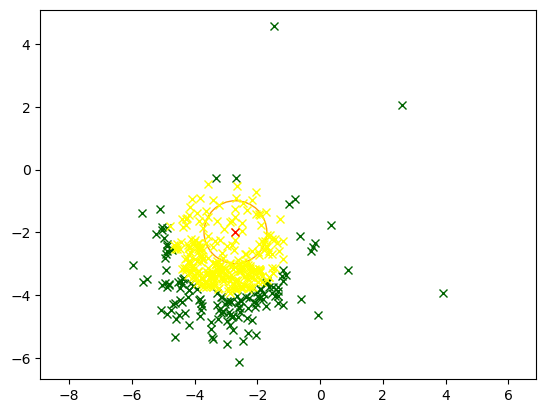

The starting point had more than minPts neighbours. 
 All yellow points are neighbours and are going to be clustered in one cluster. 
 Furthermore for each yellow point all neighbours will also be added to the current cluster.


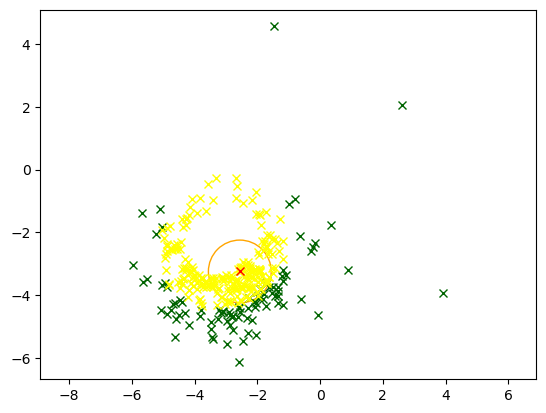

The starting point had more than minPts neighbours. 
 All yellow points are neighbours and are going to be clustered in one cluster. 
 Furthermore for each yellow point all neighbours will also be added to the current cluster.


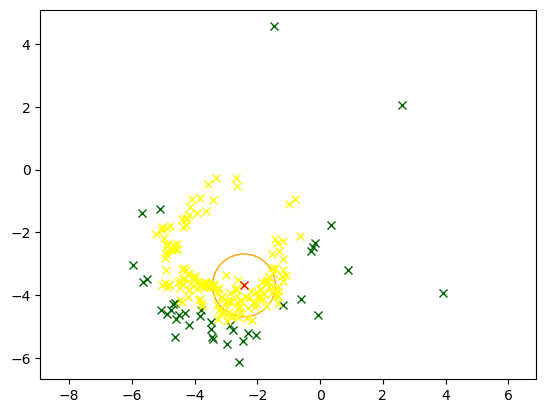

The starting point had more than minPts neighbours. 
 All yellow points are neighbours and are going to be clustered in one cluster. 
 Furthermore for each yellow point all neighbours will also be added to the current cluster.


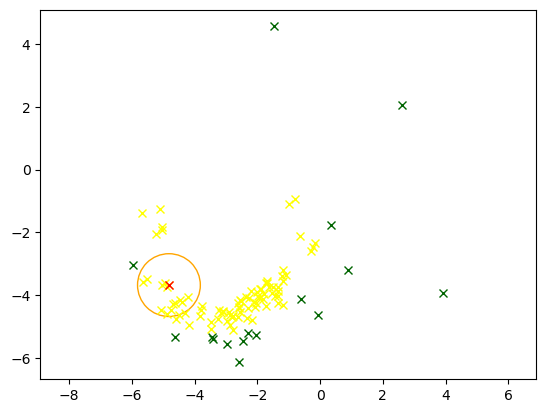

1
Here we see all data points, that are still unprocessed. 
 The red point is the random current starting point.
 In orange we can see the radius in which we are looking for neighbours and count their number. 
 All purple points are withing the radius.


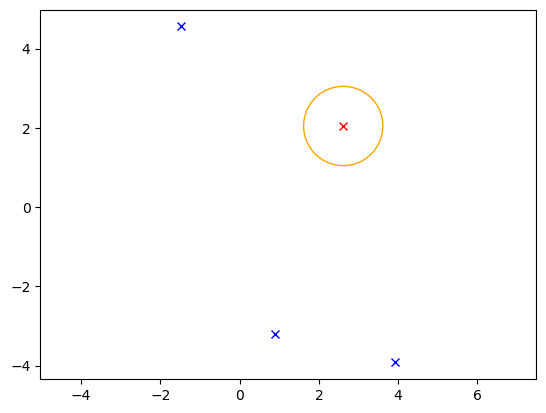

1
Here we see all data points, that are still unprocessed. 
 The red point is the random current starting point.
 In orange we can see the radius in which we are looking for neighbours and count their number. 
 All purple points are withing the radius.


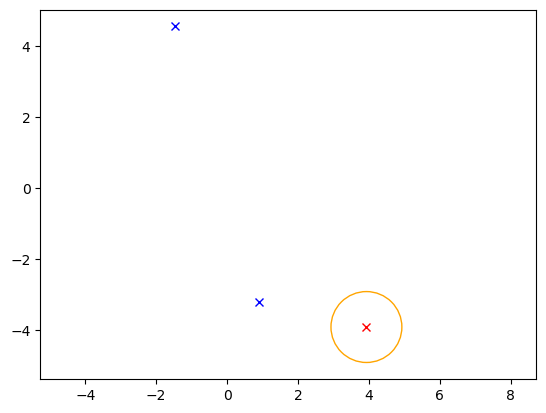

1
Here we see all data points, that are still unprocessed. 
 The red point is the random current starting point.
 In orange we can see the radius in which we are looking for neighbours and count their number. 
 All purple points are withing the radius.


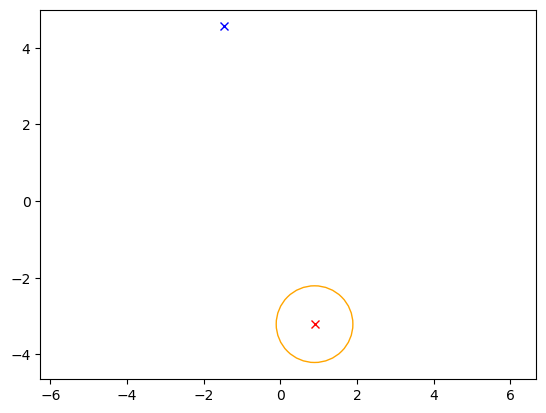

1
[[array([3.99933096, 4.27955646, 1.        ]), array([4.10298495, 3.50350493, 1.        ]), array([4.06018217, 4.90757203, 1.        ]), array([3.16473101, 4.28497232, 1.        ]), array([4.20038211, 4.04854661, 1.        ]), array([3.76717018, 4.07604459, 1.        ]), array([4.52131396, 4.58745183, 1.        ]), array([3.82167881, 3.85336373, 1.        ]), array([4.19489514, 3.37484022, 1.        ]), array([3.36627554, 4.98455281, 1.        ]), array([3.77745324, 5.10573991, 1.        ]), array([3.23634111, 4.1511661 , 1.        ]), array([4.48038719, 4.99416347, 1.        ]), array([3.57706266, 4.62922952, 1.        ]), array([3.59649779, 4.09572087, 1.        ]), array([3.4224547 , 3.70929869, 1.        ]), array([4.05081149, 5.01255652, 1.        ]), array([3.85516262, 4.65828209, 1.        ]), array([3.88201033, 4.61195935, 1.        ]), array([3.35897305, 4.72196868, 1.        ]), array([3.91351432, 4.64354348, 1.        ]), array([3.65542969, 4.96668244, 1.        ]), array(

In [20]:
# save unprocessed data and add 4th coloumn with hash for each coloumn
unprocessedData = data.T
unprocessedData = unprocessedData

identifiers = np.array([hash(str(row)) for row in unprocessedData])
identifiers = identifiers[:, np.newaxis]  
unprocessedData = np.concatenate((unprocessedData, identifiers), axis=1)

# dict with data and hash identifier
copyOriginalArray = unprocessedData.copy()
mapHashToDataPoints = {}
for row in copyOriginalArray:
    mapHashToDataPoints[row[3]] = row[:3]
noiseDataPoints = []

# initiate parameters
e = 1
MinPts = 10


# loop while dataPoints are still unprocessed:
allClusters = []
while unprocessedData.shape[0] != 0:
    # chose random starting point and delete from unprocessedData
    np.random.shuffle(unprocessedData)
    startingPoint = unprocessedData[0, :] 
    unprocessedData = np.delete(unprocessedData, 0, axis = 0)

    # calculate distance from startingPoint to all other points in unprocessedData
    distanceToStartingPointDict = {}
    for dataPoint in unprocessedData: 
        distanceToStartingPointDict[dataPoint[3]] = getEuclideanDistance(startingPoint[0], startingPoint[1], dataPoint[0], dataPoint[1])

    # all neighbours in a dict
    neighboursDict = { key: mapHashToDataPoints[key] for key, value in distanceToStartingPointDict.items() if value <= e }
    print(len(neighboursDict)+1)


    xNeighbour = []
    yNeighbour = []
    for key, value in neighboursDict.items():
        xNeighbour.append(value[0])
        yNeighbour.append(value[1])


    # plot 
    if unprocessedData.shape[0] != 0:
        print("Here we see all data points, that are still unprocessed. \n The red point is the random current starting point.\n In orange we can see the radius in which we are looking for neighbours and count their number. \n All purple points are withing the radius.")
        x = unprocessedData.T[0] 
        y = unprocessedData.T[1]
        plt.plot(x, y, "x", color = "blue") 
        plt.plot(xNeighbour, yNeighbour, "x", color = "purple") 
        plt.plot(startingPoint[0], startingPoint[1], "x", color = "red") 
        circle = Circle((startingPoint[0], startingPoint[1]), radius=e, color='orange', fill=False, linewidth=1)
        plt.gca().add_patch(circle)
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.xlim(-8, 8)
        plt.ylim(-8, 8)
        plt.axis("equal") 
        plt .show()



    if len(neighboursDict)+1 >= MinPts:

        currentCluster = []
        currentCluster.append(startingPoint[:3])
        counter = 0
        # while loop, to get all neighbours of neighbours until no neighbours any more
        while len(neighboursDict) > 0:
            firstKey = next(iter(neighboursDict)) # get first key of dictionary (is index of one of neighbouring points)
            currentPoint = neighboursDict[firstKey]


            # calc all distances to current neighbour = CurrentPoint
            distanceTocurrentPointDict = {}
            for dataPoint in unprocessedData: 
                if not ((currentPoint==dataPoint[:3]).all()):
                    distanceTocurrentPointDict[dataPoint[3]] = getEuclideanDistance(currentPoint[0], currentPoint[1], dataPoint[0], dataPoint[1])

            # add all neighbourNeighbours within reach to neighbour dictionary (if not already in there)
            neighboursNeighboursDict = {}      
            neighboursNeighboursDict = {key: mapHashToDataPoints[key] for key, value in distanceTocurrentPointDict.items() if value <= e }
            onlyNewPointsDict = {key: value for key, value in neighboursNeighboursDict.items() if key not in neighboursDict}
            neighboursDict.update(onlyNewPointsDict)

            if counter%100 == 0:
                print("The starting point had more than minPts neighbours. \n All yellow points are neighbours and are going to be clustered in one cluster. \n Furthermore for each yellow point all neighbours will also be added to the current cluster.")
                x = unprocessedData.T[0] 
                y = unprocessedData.T[1]

                xNeighbour = []
                yNeighbour = []
                for key, value in neighboursDict.items():
                    xNeighbour.append(value[0])
                    yNeighbour.append(value[1])


                plt.plot(x, y, "x", color = "darkgreen") 
                plt.plot(xNeighbour, yNeighbour, "x", color = "yellow") 
                plt.plot(currentPoint[0], currentPoint[1], "x", color = "red") 
                circle = Circle((currentPoint[0], currentPoint[1]), radius=e, color='orange', fill=False, linewidth=1)
                plt.gca().add_patch(circle)
                plt.xlabel('X-axis')
                plt.ylabel('Y-axis')
                plt.xlim(-8, 8)
                plt.ylim(-8, 8)
                plt.axis("equal") 
                plt.show()            
            

            # delete all dataPoints from unprocessedData if already in neighboursDict:
            hashIdentifiers = unprocessedData[:, 3]
            doubleKeys = np.array(list(neighboursDict.keys()))
            mask = ~np.isin(hashIdentifiers, doubleKeys)
            unprocessedData = unprocessedData[mask]

            # add currentPoint to cluster
            currentCluster.append(currentPoint)

            # delete currentPoint from neighboursDict
            del neighboursDict[firstKey]
            counter+=1
            #print(len(neighboursDict))

        # append currentCluster to allClusters  
        allClusters.append(currentCluster)
        #print(f"cluster data: {currentCluster}")

    else: 
        noiseDataPoints.append(startingPoint) 
        #print(f"noise data: {noiseDataPoints}")

    #print(len(unprocessedData))

#allClusters = np.array(allClusters)
#noiseDataPoints = np.array(noiseDataPoints)
print(allClusters)
print(noiseDataPoints)



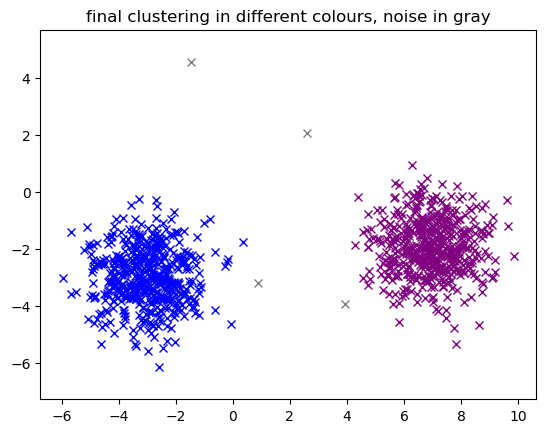

In [19]:
# visualize final outcome:

xCluster1 = []
for dataPoint in allClusters[0]:
    xCluster1.append(dataPoint[0])

yCluster1 = []
for dataPoint in allClusters[0]:
    yCluster1.append(dataPoint[1])


xCluster2 = []
for dataPoint in allClusters[1]:
    xCluster2.append(dataPoint[0])


yCluster2 = []
for dataPoint in allClusters[1]:
    yCluster2.append(dataPoint[1])

xNoise = []
for dataPoint in noiseDataPoints:
    xNoise.append(dataPoint[0])

yNoise = []
for dataPoint in noiseDataPoints:
    yNoise.append(dataPoint[1])

plt.title("final clustering in different colours, noise in gray")
plt.plot(xCluster1, yCluster1, "x", color = "purple") 
plt.plot(xCluster2, yCluster2, "x", color = "blue") 
plt.plot(xNoise, yNoise, "x", color = "grey") 
plt.axis("equal") 
plt .show()


### What we observed

Since DBSCAN is a density based clustering method, cluster need to be similar in density and not to close together to be classified correctly. Also, e and minPts need to be well aligned with the data in order for the algorithm to work well.

Also, "outliers" (i.e. points that are further away from the mean of their distributions than all the others) will likely be classified as noise.

Since we did not implement the original DBSCAN (with core and border points being treated differently) the clustering is highly dependendon ehich random starting point are chosen by chance. This can decide for some pointswhether they will be classified as part of a cluster or noise!


### Here is an example with three clusters:

75


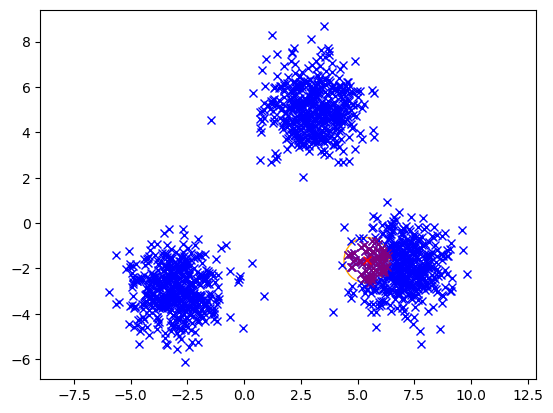

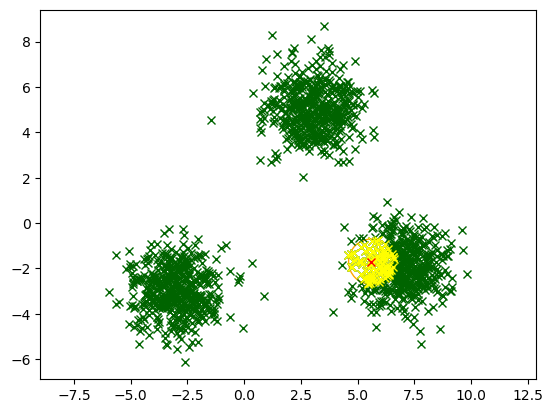

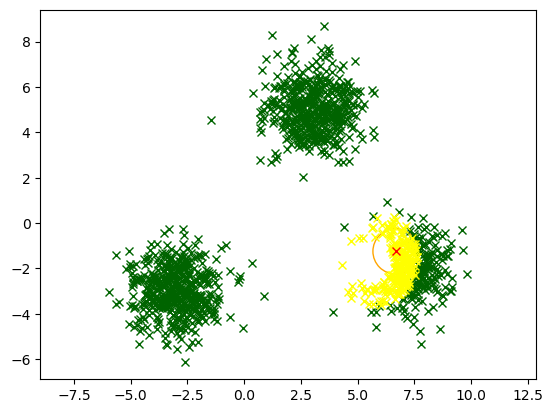

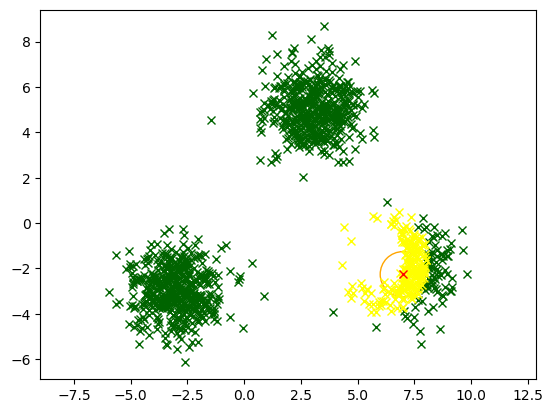

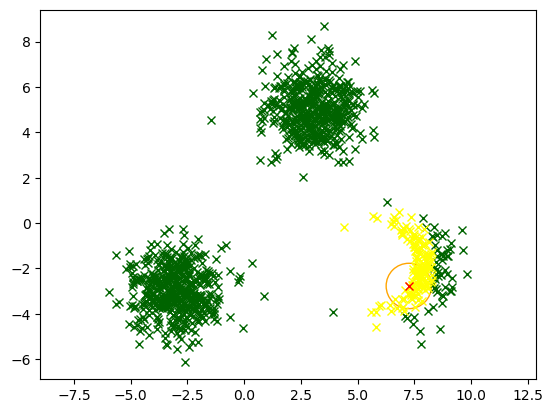

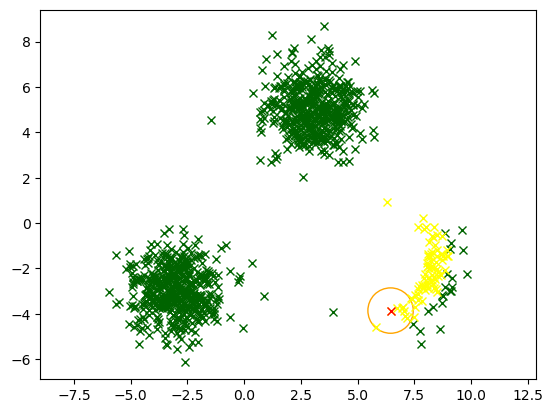

55


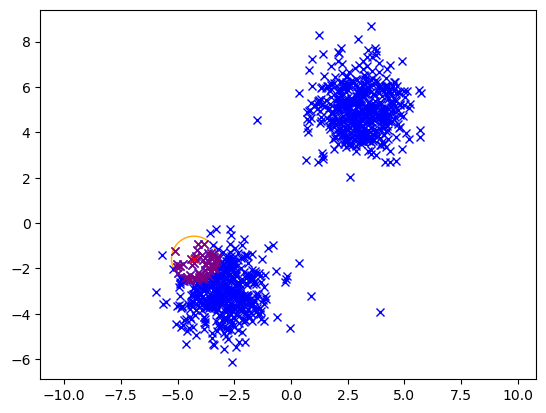

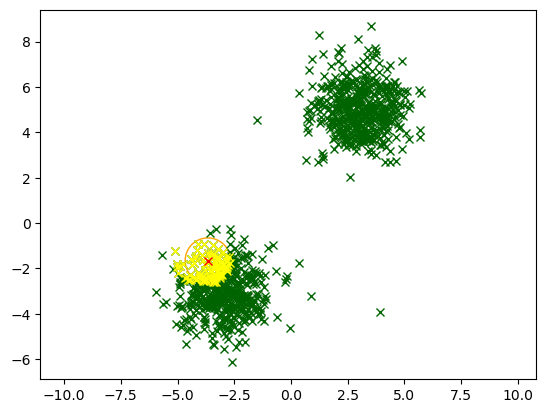

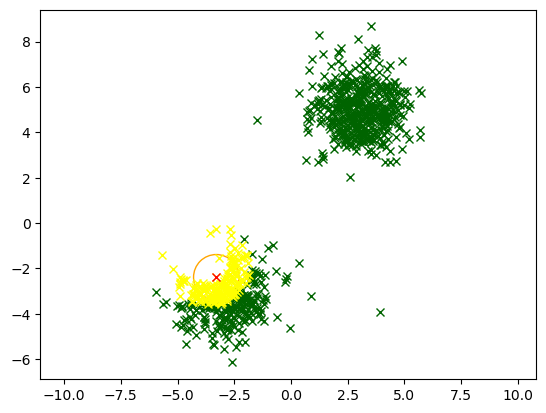

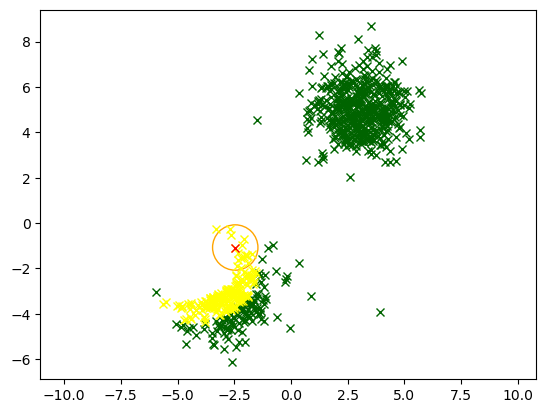

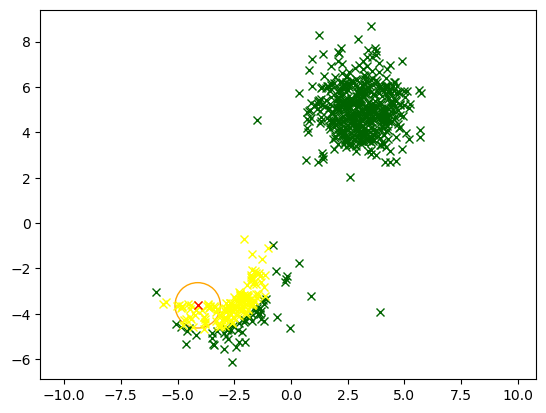

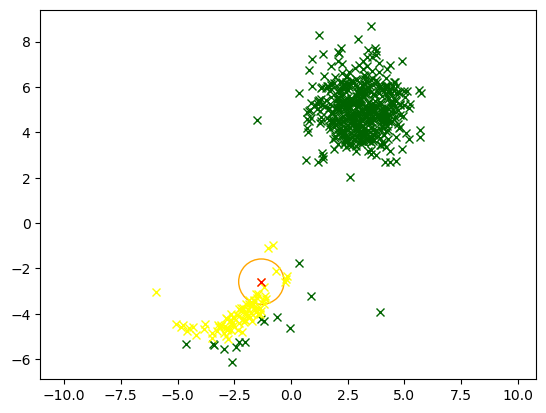

60


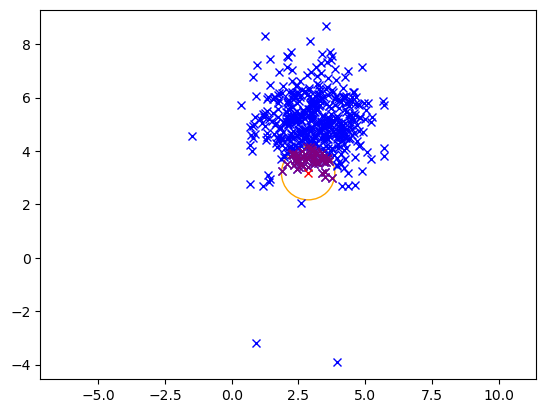

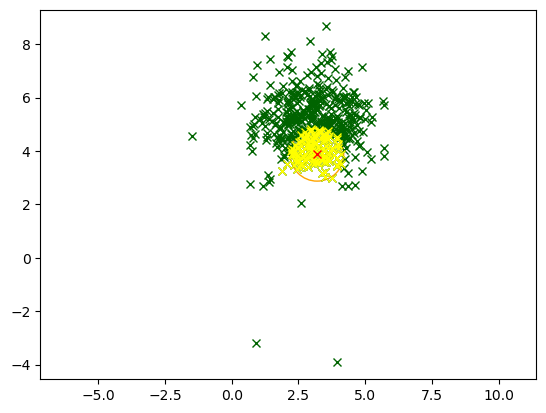

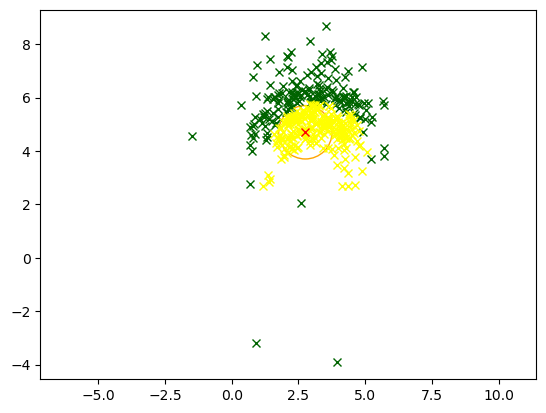

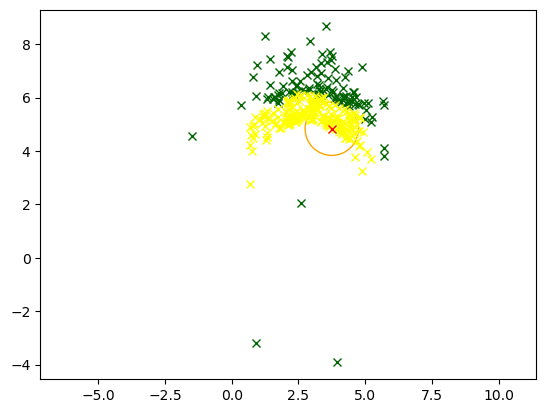

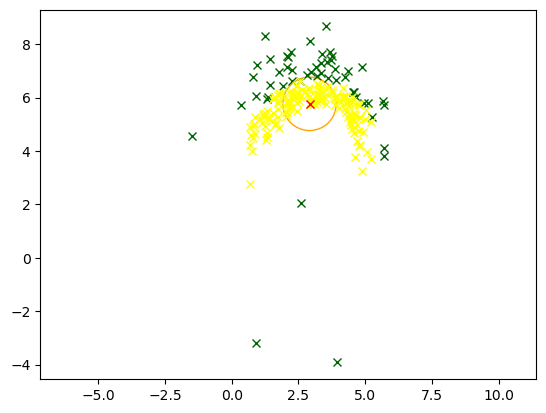

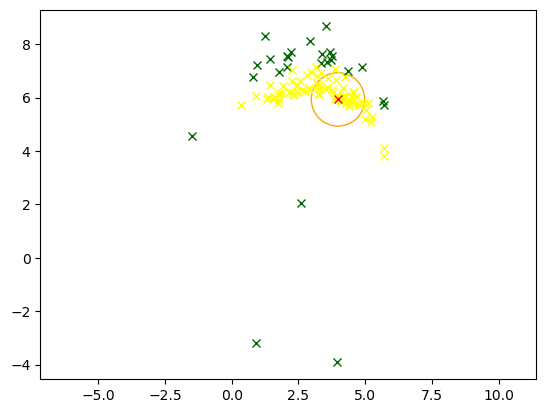

1


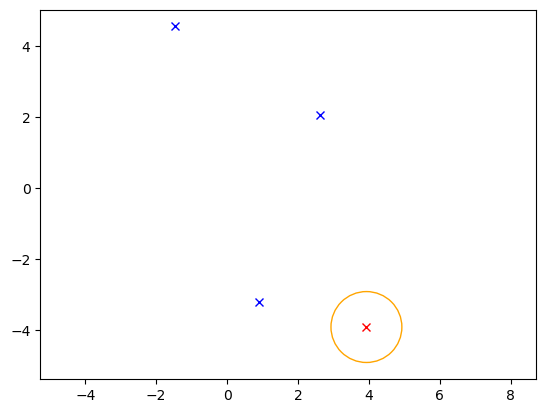

1


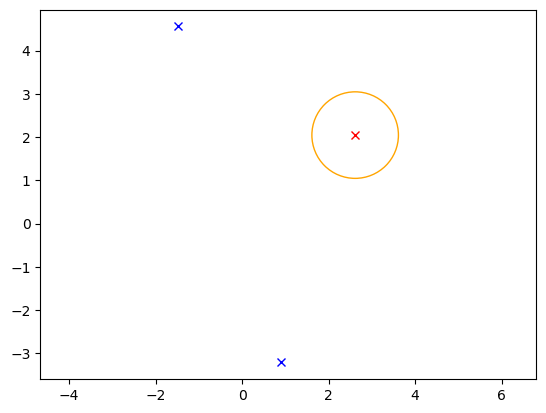

1


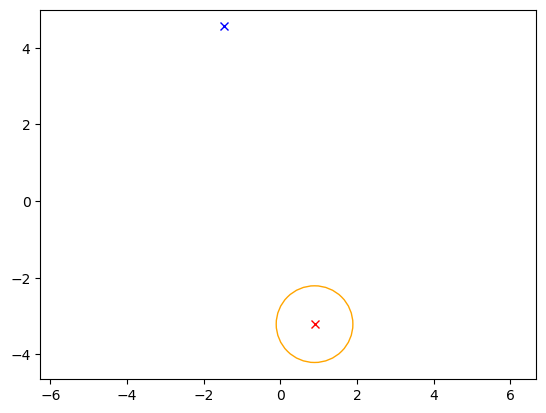

1
[[array([ 5.39977124, -1.63669525,  3.        ]), array([ 5.60148353, -1.70166136,  3.        ]), array([ 5.90929529, -0.91592268,  3.        ]), array([ 6.10153616, -1.48886065,  3.        ]), array([ 6.05271028, -2.16816693,  3.        ]), array([ 4.8988595, -1.619741 ,  3.       ]), array([ 5.2899388 , -0.94559434,  3.        ]), array([ 5.32965605, -2.39908491,  3.        ]), array([ 4.73375514, -1.94680719,  3.        ]), array([ 6.16488875, -2.15524964,  3.        ]), array([ 5.92697051, -2.19179598,  3.        ]), array([ 5.67344971, -2.13609054,  3.        ]), array([ 5.30699278, -1.22337413,  3.        ]), array([ 5.75321811, -1.68056686,  3.        ]), array([ 5.1348428 , -2.24178344,  3.        ]), array([ 5.90282956, -1.45113055,  3.        ]), array([ 6.28241635, -1.33677254,  3.        ]), array([ 5.43526397, -2.44876539,  3.        ]), array([ 5.76029942, -2.06475383,  3.        ]), array([ 6.29337855, -1.92039025,  3.        ]), array([ 5.63296457, -2.49145032,  3.   

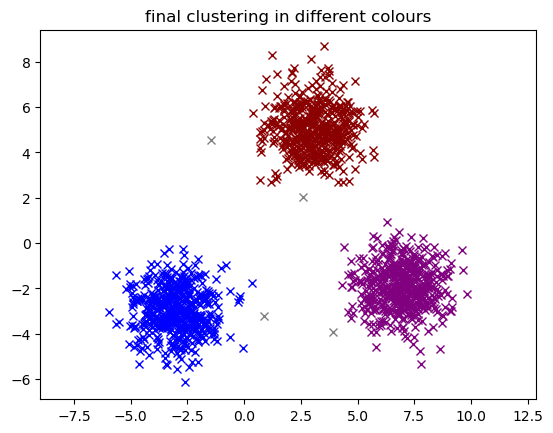

In [18]:
# test with having added more distributions (clusters)

# generate data

mean= [3, 5]
cov = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean, cov, 500).T

new_col_a = np.ones((1, a.shape[1]))
a = np.append(a, new_col_a, axis = 0)

mean= [-3, -3]
cov = [[1, 0], [0, 1]]
b = np.random.multivariate_normal(mean, cov, 500).T

new_col_b = np.full((1, b.shape[1]), 2)
b = np.append(b, new_col_b, axis = 0)

mean= [7, -2]
cov = [[1, 0], [0, 1]]
d = np.random.multivariate_normal(mean, cov, 500).T

new_col_d = np.full((1, d.shape[1]), 3)
d = np.append(d, new_col_d, axis = 0)



c = np.concatenate((a, b, d) , axis = 1) 
c=c.T
np.random.shuffle(c)
data=c.T


# save unprocessed data and add 4th coloumn with hash for each coloumn
unprocessedData = data.T
unprocessedData = unprocessedData

identifiers = np.array([hash(str(row)) for row in unprocessedData])
identifiers = identifiers[:, np.newaxis]  
unprocessedData = np.concatenate((unprocessedData, identifiers), axis=1)

# dict with data and hash identifier
copyOriginalArray = unprocessedData.copy()
mapHashToDataPoints = {}
for row in copyOriginalArray:
    mapHashToDataPoints[row[3]] = row[:3]
noiseDataPoints = []

# initiate parameters
e = 1
MinPts = 10


# loop while dataPoints are still unprocessed:
allClusters = []
while unprocessedData.shape[0] != 0:
    # chose random starting point and delete from unprocessedData
    np.random.shuffle(unprocessedData)
    startingPoint = unprocessedData[0, :] 
    unprocessedData = np.delete(unprocessedData, 0, axis = 0)

    # calculate distance from startingPoint to all other points in unprocessedData
    distanceToStartingPointDict = {}
    for dataPoint in unprocessedData: 
        distanceToStartingPointDict[dataPoint[3]] = getEuclideanDistance(startingPoint[0], startingPoint[1], dataPoint[0], dataPoint[1])

    # all neighbours in a dict
    neighboursDict = { key: mapHashToDataPoints[key] for key, value in distanceToStartingPointDict.items() if value <= e }
    print(len(neighboursDict)+1)


    xNeighbour = []
    yNeighbour = []
    for key, value in neighboursDict.items():
        xNeighbour.append(value[0])
        yNeighbour.append(value[1])


    # plot 
    if unprocessedData.shape[0] != 0:
        x = unprocessedData.T[0] 
        y = unprocessedData.T[1]
        plt.plot(x, y, "x", color = "blue") 
        plt.plot(xNeighbour, yNeighbour, "x", color = "purple") 
        plt.plot(startingPoint[0], startingPoint[1], "x", color = "red") 
        circle = Circle((startingPoint[0], startingPoint[1]), radius=e, color='orange', fill=False, linewidth=1)
        plt.gca().add_patch(circle)
        plt.xlim(-8, 12)
        plt.ylim(-8, 12)
        plt.axis("equal") 
        plt .show()



    if len(neighboursDict)+1 >= MinPts:

        currentCluster = []
        currentCluster.append(startingPoint[:3])
        counter = 0
        # while loop, to get all neighbours of neighbours until no neighbours any more
        while len(neighboursDict) > 0:
            firstKey = next(iter(neighboursDict)) # get first key of dictionary (is index of one of neighbouring points)
            currentPoint = neighboursDict[firstKey]


            # calc all distances to current neighbour = CurrentPoint
            distanceTocurrentPointDict = {}
            for dataPoint in unprocessedData: 
                if not ((currentPoint==dataPoint[:3]).all()):
                    distanceTocurrentPointDict[dataPoint[3]] = getEuclideanDistance(currentPoint[0], currentPoint[1], dataPoint[0], dataPoint[1])

            # add all neighbourNeighbours within reach to neighbour dictionary (if not already in there)
            neighboursNeighboursDict = {}      
            neighboursNeighboursDict = {key: mapHashToDataPoints[key] for key, value in distanceTocurrentPointDict.items() if value <= e }
            onlyNewPointsDict = {key: value for key, value in neighboursNeighboursDict.items() if key not in neighboursDict}
            neighboursDict.update(onlyNewPointsDict)

            if counter%100 == 0:
                x = unprocessedData.T[0] 
                y = unprocessedData.T[1]

                xNeighbour = []
                yNeighbour = []
                for key, value in neighboursDict.items():
                    xNeighbour.append(value[0])
                    yNeighbour.append(value[1])


                plt.plot(x, y, "x", color = "darkgreen") 
                plt.plot(xNeighbour, yNeighbour, "x", color = "yellow") 
                plt.plot(currentPoint[0], currentPoint[1], "x", color = "red") 
                circle = Circle((currentPoint[0], currentPoint[1]), radius=e, color='orange', fill=False, linewidth=1)
                plt.gca().add_patch(circle)
                plt.xlim(-8, 12)
                plt.ylim(-8, 12)
                plt.axis("equal") 
                plt.show()            
            

            # delete all dataPoints from unprocessedData if already in neighboursDict:
            hashIdentifiers = unprocessedData[:, 3]
            doubleKeys = np.array(list(neighboursDict.keys()))
            mask = ~np.isin(hashIdentifiers, doubleKeys)
            unprocessedData = unprocessedData[mask]

            # add currentPoint to cluster
            currentCluster.append(currentPoint)

            # delete currentPoint from neighboursDict
            del neighboursDict[firstKey]
            counter+=1
            #print(len(neighboursDict))

        # append currentCluster to allClusters  
        allClusters.append(currentCluster)
        #print(f"cluster data: {currentCluster}")

    else: 
        noiseDataPoints.append(startingPoint) 
        #print(f"noise data: {noiseDataPoints}")

    #print(len(unprocessedData))

#allClusters = np.array(allClusters)
#noiseDataPoints = np.array(noiseDataPoints)
print(allClusters)
print(noiseDataPoints)

# visualize final outcome:

xCluster1 = []
for dataPoint in allClusters[0]:
    xCluster1.append(dataPoint[0])

print(xCluster1)

yCluster1 = []
for dataPoint in allClusters[0]:
    yCluster1.append(dataPoint[1])

print(len(yCluster1))


xCluster2 = []
for dataPoint in allClusters[1]:
    xCluster2.append(dataPoint[0])


yCluster2 = []
for dataPoint in allClusters[1]:
    yCluster2.append(dataPoint[1])


xCluster3 = []
for dataPoint in allClusters[2]:
    xCluster3.append(dataPoint[0])


yCluster3 = []
for dataPoint in allClusters[2]:
    yCluster3.append(dataPoint[1])

xNoise = []
for dataPoint in noiseDataPoints:
    xNoise.append(dataPoint[0])

print(len(xNoise))

yNoise = []
for dataPoint in noiseDataPoints:
    yNoise.append(dataPoint[1])

plt.title("final clustering in different colours")
plt.plot(xCluster1, yCluster1, "x", color = "purple") 
plt.plot(xCluster2, yCluster2, "x", color = "blue") 
plt.plot(xCluster3, yCluster3, "x", color = "darkred") 
plt.plot(xNoise, yNoise, "x", color = "grey") 
plt.axis("equal") 
plt .show()
